In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/riddhi/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/riddhi/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/Users/riddhi/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/Users/ri

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/riddhi/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/riddhi/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/Users/riddhi/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/Users/ri

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/riddhi/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/riddhi/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/Users/riddhi/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/Users/ri

AttributeError: _ARRAY_API not found

In [2]:
df = pd.read_csv("cleaned_data.csv")

/var/folders/gp/kq74h7g558vdsmhjykqfs5wh0000gn/T/ipykernel_27967/1989269044.py:1: DtypeWarning: Columns (988,1170,1351,1365,1379,1393,1407,1412,1413,1436,1441,1442,1445,1446,1447,1450,1453,1454,1455,1456,1459,1460,1462,1473,1474,1475,1476,1487,1488,1489,1490,1491,1492,1497,1498,1501,1502,1503,1505,1508,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1525,1526,1527,1528,1529,1530,1532,1534,1535,1545,1548,1549,1550,1552,1555,1556,1557,1558,1559,1560,1562,1563,1564,1566,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1580,1583,1584,1587,1588,1589,1592,1593,1594,1597,1598,1601,1602,1605,1609,1623,1624,1625,1638,1653,1664,1679,1690,1692,1695,1702,1708,1711,1725,1726,1727,1728,1815,1816,1818,1823,1824,1830,1831,1844,1845,1846,1879,1880,1881,1882,1883,1908,1909,1910,1911,1912,1913,1961,1962,1963,1964,1983,1984,2044,2045,2046,2047,2072,2073,2074,2075,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2100,2101,2102,2103,2108,2109,2110,2111,2160,2259,2

In [3]:
y = df["MD_EARN_WNE_P10"].values
X = df["SAT_AVG"].values
regions, region_index = np.unique(df["REGION_NAME"], return_inverse=True)
R = len(regions)
N= len(y)

In [4]:
#Standardize X
X = (X - np.mean(X))/np.std(X)

In [5]:
S = 100000
alpha = 0.1
beta = 0.1
mu = 0.5
tau = 0.1
sigma = 0.05

In [6]:
b_samples = np.zeros((S))
a_samples = np.zeros((S,R))
m_samples = np.zeros((S))
t_samples = np.zeros((S))
s_samples = np.zeros((S))

In [7]:
a_val = np.zeros(R)
b_val = 0
m_val = 0
t_val = 1
s_val = 10

Log Functiosn

In [8]:
def log_likelihood(y, x, alpha, beta, sigma):
  mu = alpha[region_index] +(beta*x)
  return (-0.5*np.sum(np.log(2*np.pi*sigma**2) + ((y - mu)**2)/(sigma**2)))

In [9]:
def log_prior(beta, alpha, mu_alpha, tau_alpha, sigma):
  #Cauchhy distribution
  lp_beta = np.log(1/(np.pi*5*(1+(beta/5)**2)))
  #Notmal distribution
  lp_alpha = -0.5*np.sum((alpha-mu_alpha)**2 / tau_alpha**2) - (R*np.log(tau_alpha))
  #Normal
  lp_mu_alpha = -0.5*(mu_alpha**2/(50**2))
  #Half cauchy
  if tau_alpha <= 0:
    lp_tau_alpha = -np.inf
  else:
    lp_tau_alpha = np.log(2/np.pi)+np.log(5)-np.log((5**2) + tau_alpha**2)

  #half cauchy
  if sigma <= 0:
    lp_sigma = -np.inf
  else:
    lp_sigma = np.log(2/np.pi) +np.log(5)-np.log((5**2)+(sigma**2))

  return lp_beta + lp_alpha + lp_mu_alpha + lp_tau_alpha + lp_sigma


In [10]:
def log_post(y, x, alpha, beta, mu_alpha, tau_alpha, sigma):
  return log_likelihood(y,x,alpha, beta, sigma) + log_prior(beta, alpha, mu_alpha, tau_alpha, sigma)

Sampling

In [11]:
for s in range(S):
  #sample beta
  b_prop = b_val + np.random.normal(0, beta)
  logA = log_post(y,X,a_val, b_prop, m_val, t_val, s_val) - log_post(y, X, a_val, b_val, m_val, t_val, s_val)
  if np.log(np.random.rand()) < logA:
    b_val = b_prop
  b_samples[s] = b_val

  #sample alpha
  for r in range(R):
    a_prop = a_val.copy()
    a_prop[r] += np.random.normal(0, alpha)
    logA = log_post(y,X,a_prop, b_val, m_val, t_val,s_val) - log_post(y, X, a_val, b_val, m_val, t_val, s_val)
    if np.log(np.random.rand()) < logA:
      a_val[r] = a_prop[r]
  a_samples[s,:] = a_val

  #sample mu
  m_prop = m_val + np.random.normal(0, mu)
  logA = log_post(y,X,a_val, b_val, m_prop, t_val,s_val) - log_post(y, X, a_val, b_val, m_val, t_val, s_val)
  if np.log(np.random.rand()) < logA:
    m_val = m_prop
  m_samples[s] = m_val
  #sample tau
  t_prop = np.abs(t_val+np.random.normal(0, tau))
  logA = log_post(y,X,a_val, b_val, m_val, t_prop,s_val) - log_post(y, X, a_val, b_val, m_val, t_val, s_val)
  if np.log(np.random.rand()) < logA:
    t_val = t_prop
  t_samples[s] = t_val

  #sample sigma
  s_prop = np.exp(np.log(s_val) + np.random.normal(0, sigma))
  logA = log_post(y,X,a_val, b_val, m_val, t_val,s_prop) - log_post(y, X, a_val, b_val, m_val, t_val, s_val)
  if np.log(np.random.rand()) < logA:
    s_val = s_prop
  s_samples[s] = s_val

Visualization

In [12]:
def visualize_outcome(samples, param_name, burn_in=10000):
    samples_post = samples[burn_in:]
    print(param_name)
    plt.figure(figsize=(16,4))
    plt.subplot(1,3,1)
    plt.plot(samples_post)
    plt.xlabel("Iteration")
    plt.ylabel(param_name)
    plt.title("Trace Plot")
    
    plt.subplot(1,3,2)
    sns.histplot(samples_post, kde=True, bins=50)
    plt.title("Posterior Distribution")
  
    plt.subplot(1,3,3)
    plot_acf(samples_post, lags=50, ax=plt.gca())
    
    plt.tight_layout()
    plt.show()

Beta


/Users/riddhi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


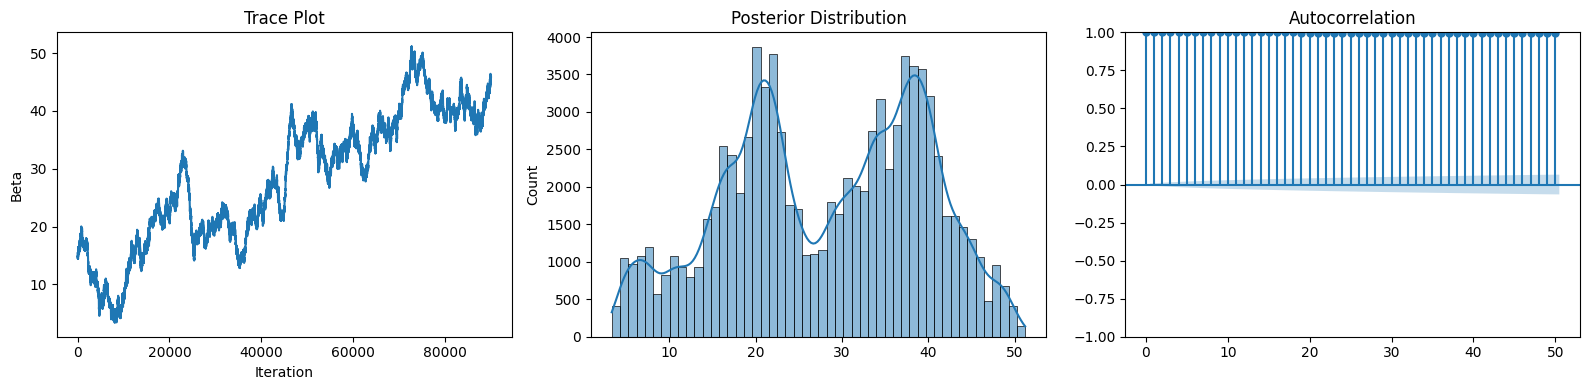

In [13]:
visualize_outcome(b_samples, "Beta")


Alpha - Region: Far West


/Users/riddhi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


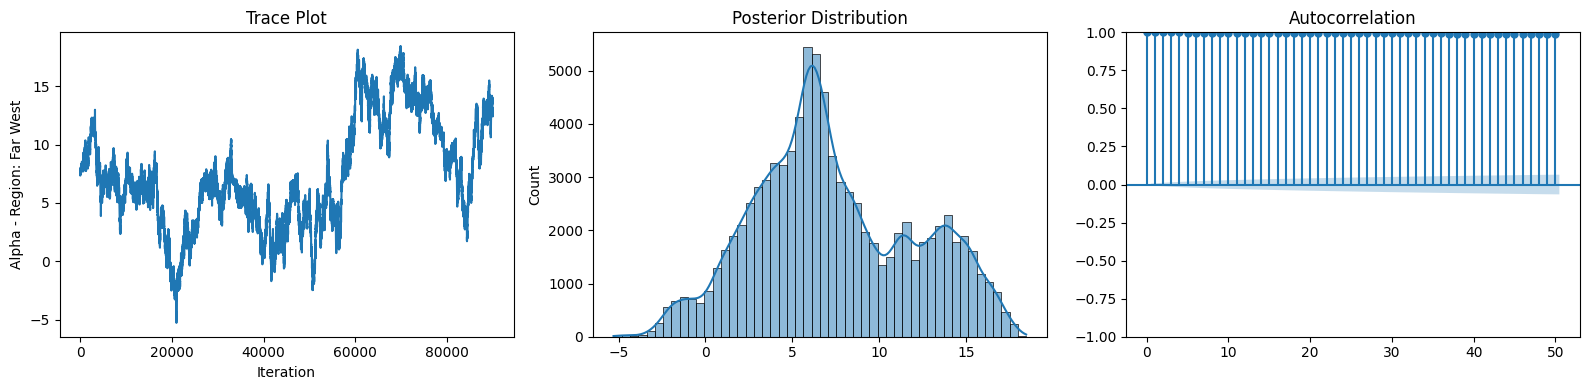

Alpha - Region: Great Lakes


/Users/riddhi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


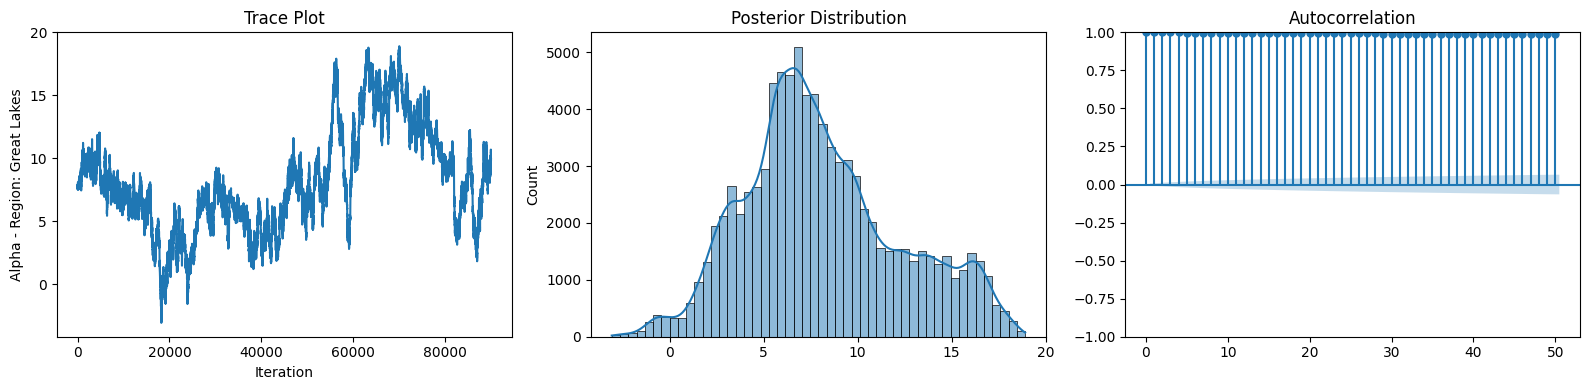

Alpha - Region: Mid East


/Users/riddhi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


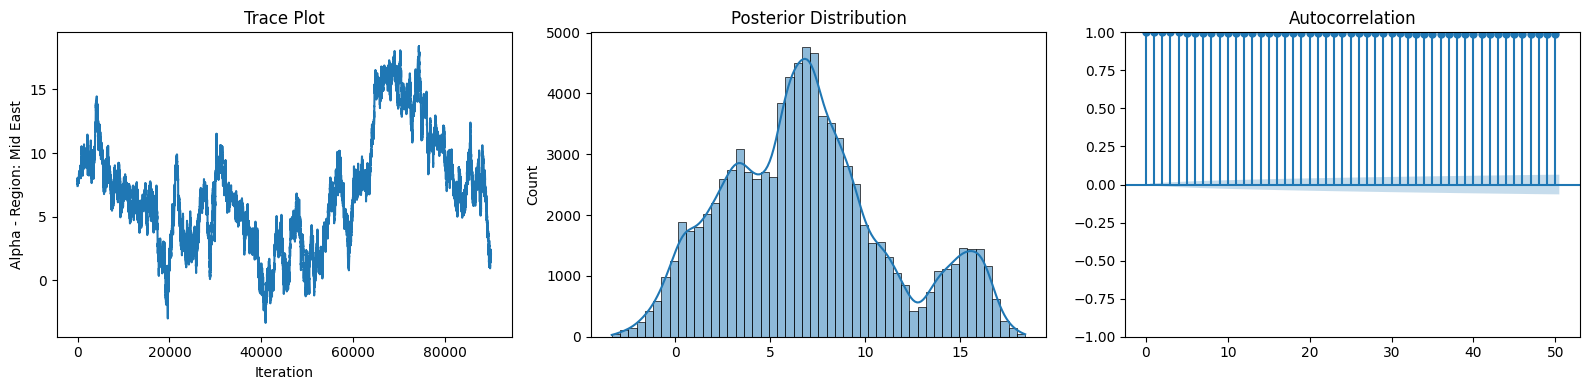

Alpha - Region: New England


/Users/riddhi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


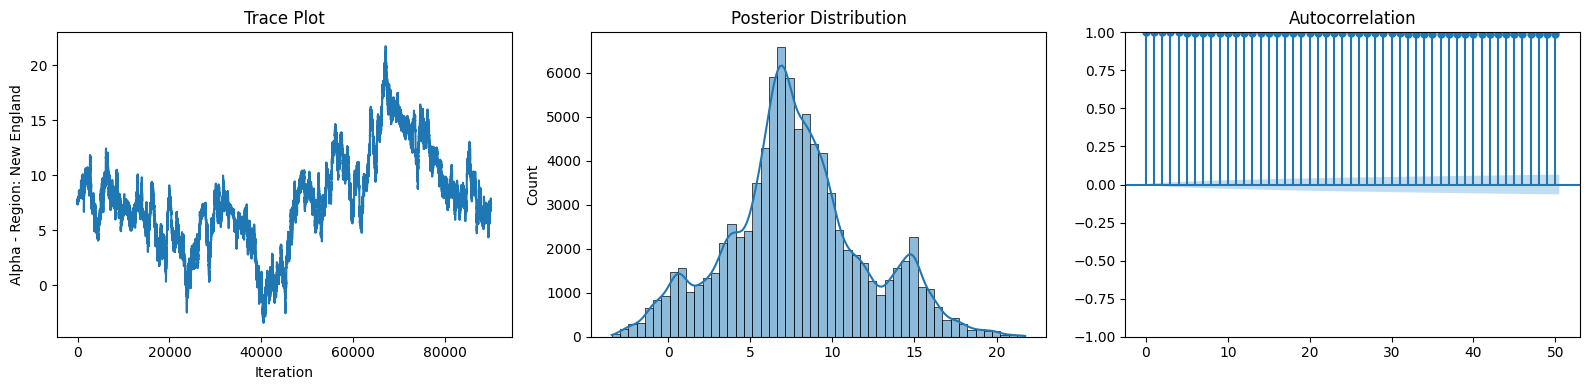

Alpha - Region: Outlying Areas


/Users/riddhi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


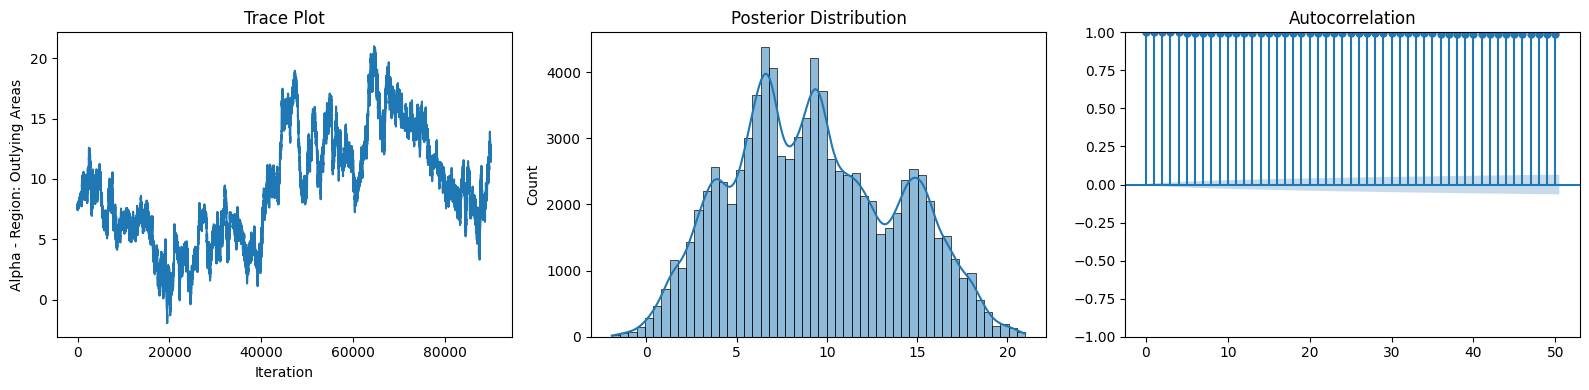

Alpha - Region: Plains


/Users/riddhi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


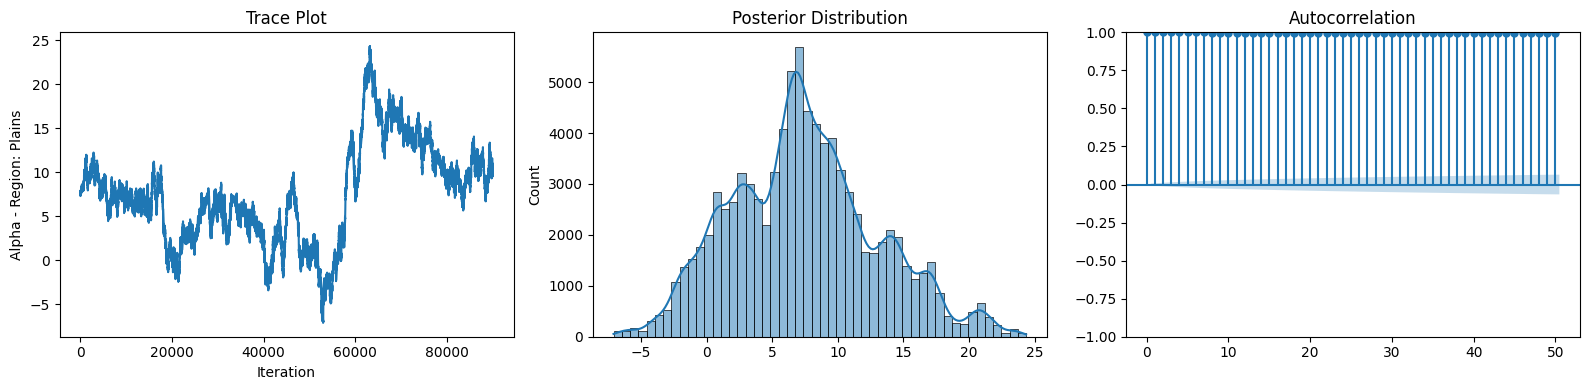

Alpha - Region: Rocky Mountains


/Users/riddhi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


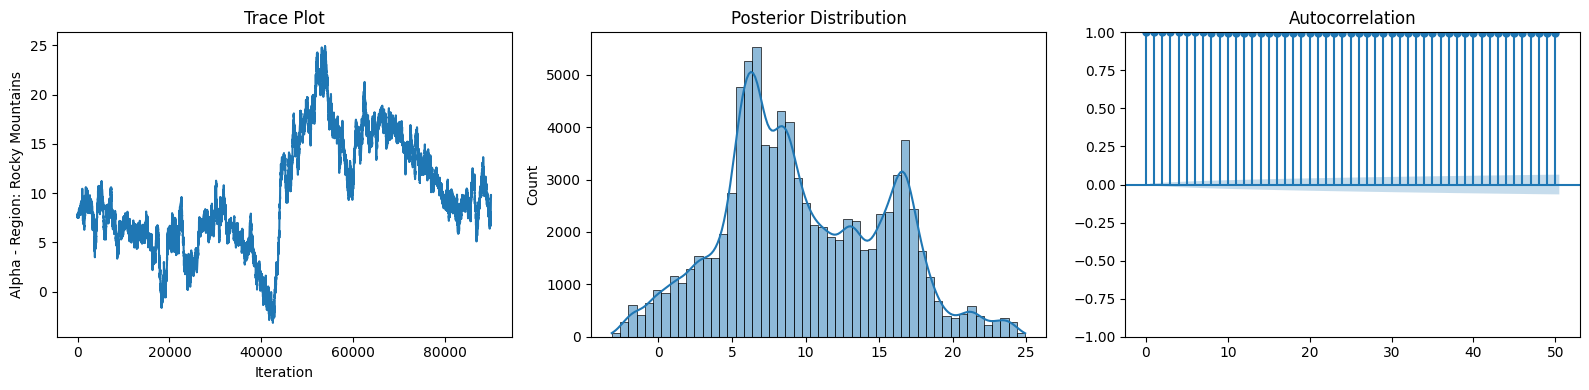

Alpha - Region: Southeast


/Users/riddhi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


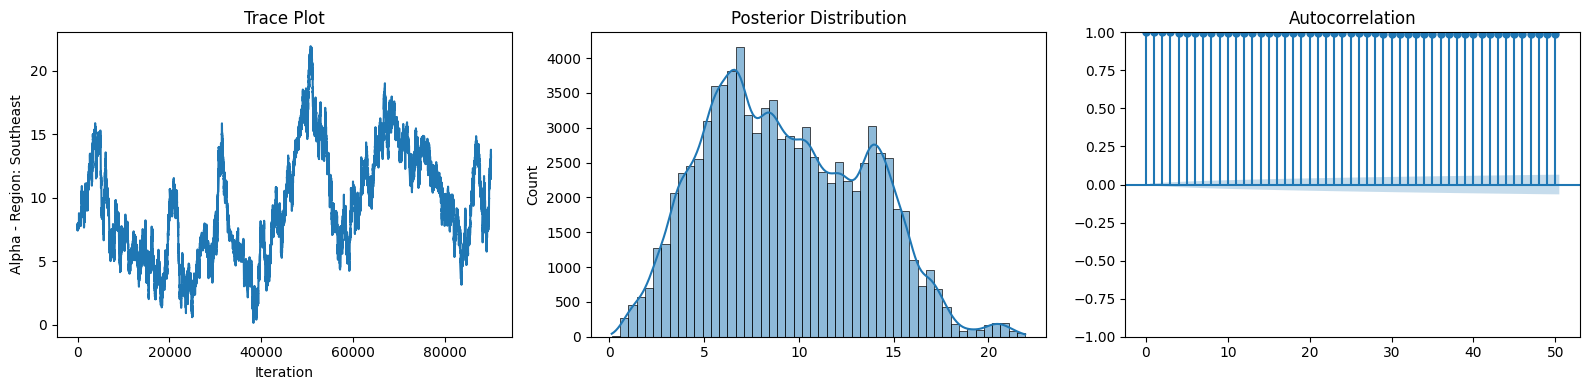

Alpha - Region: Southwest


/Users/riddhi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


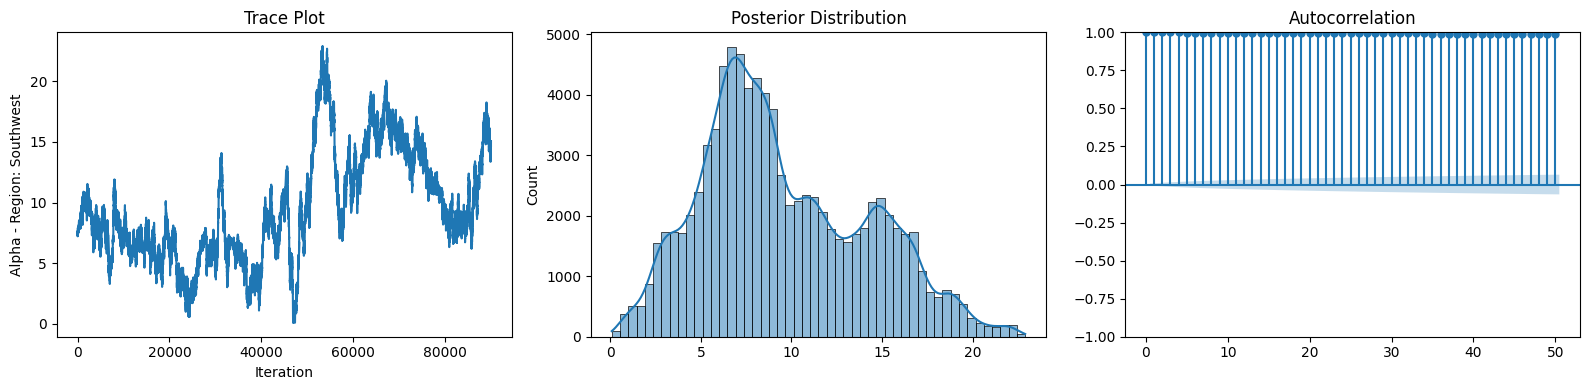

Alpha - Region: U.S. Service Schools


/Users/riddhi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


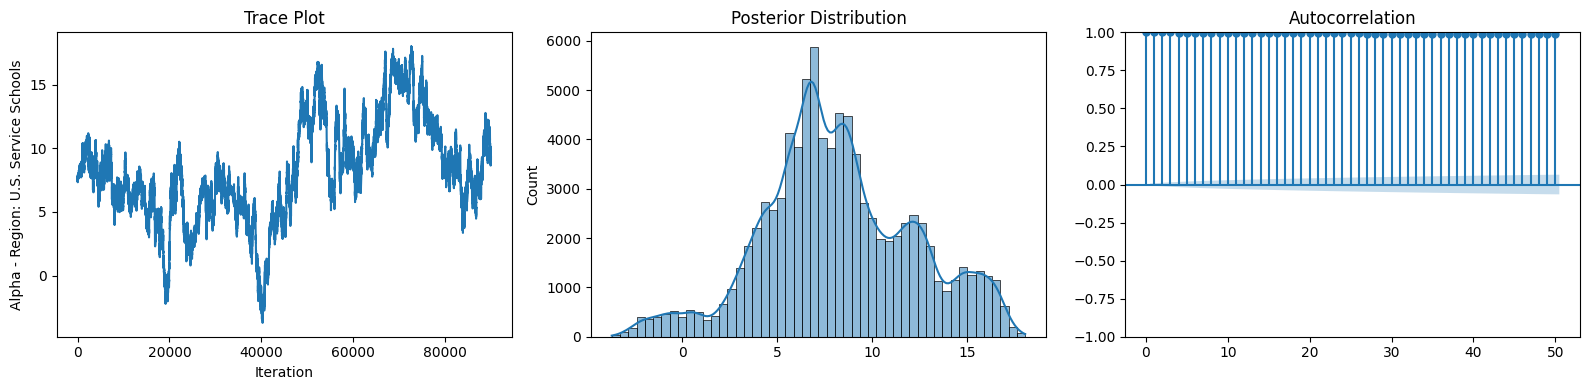

In [14]:
for r in range(R):
    visualize_outcome(a_samples[:,r], f"Alpha - Region: {regions[r]}")


Mu


/Users/riddhi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


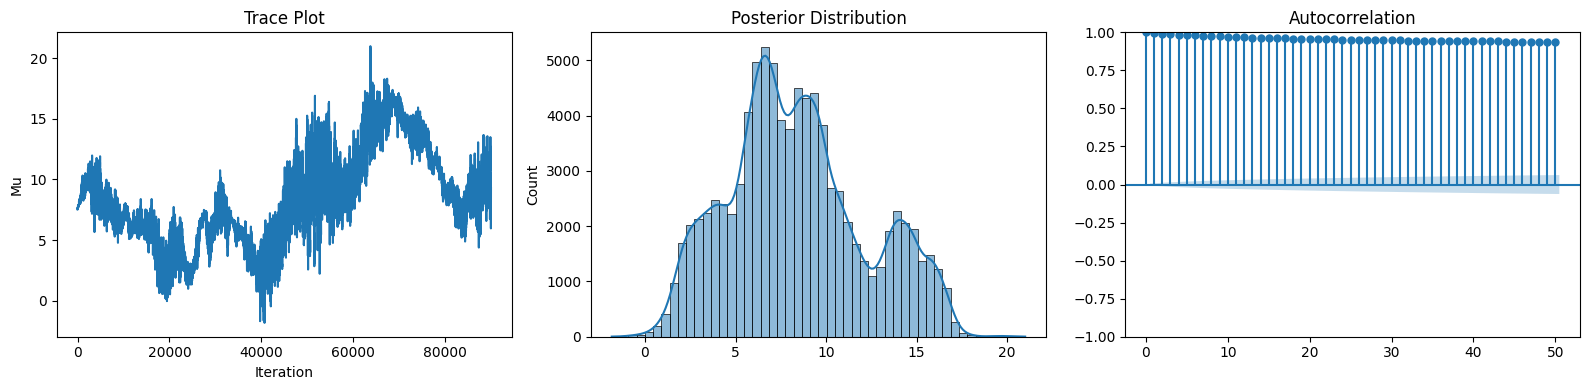

In [15]:
visualize_outcome(m_samples, "Mu")


Tau


/Users/riddhi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


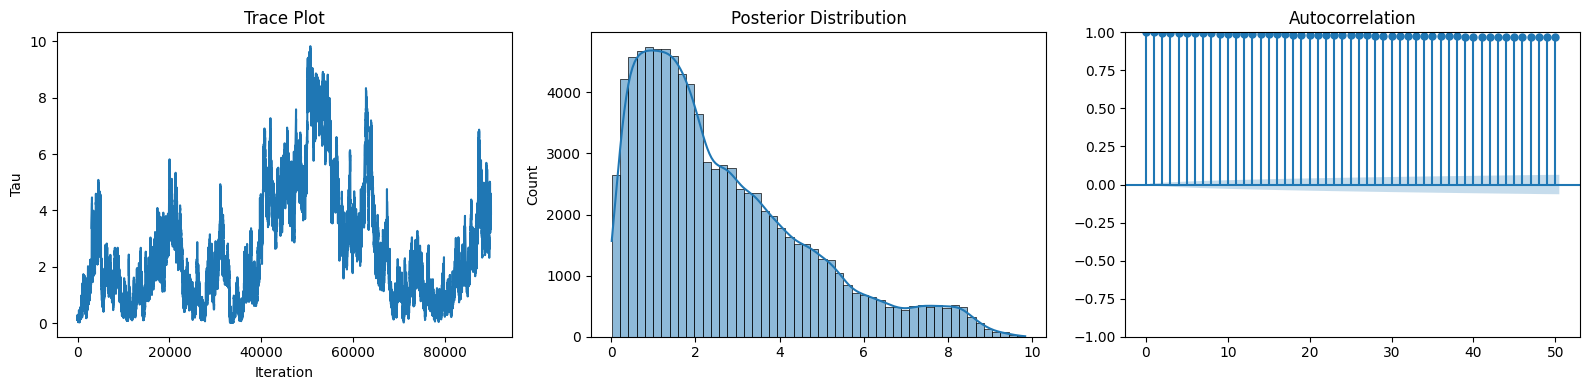

In [16]:
visualize_outcome(t_samples, "Tau")


Sigma


/Users/riddhi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


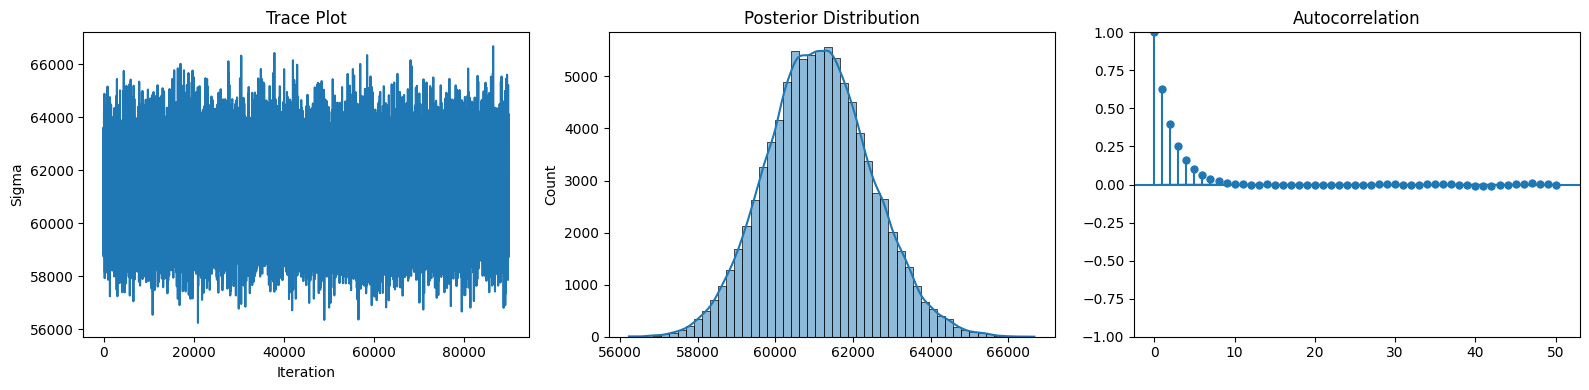

In [17]:
visualize_outcome(s_samples, "Sigma")


/var/folders/gp/kq74h7g558vdsmhjykqfs5wh0000gn/T/ipykernel_27967/2495781291.py:4: DtypeWarning: Columns (988,1170,1351,1365,1379,1393,1407,1412,1413,1436,1441,1442,1445,1446,1447,1450,1453,1454,1455,1456,1459,1460,1462,1473,1474,1475,1476,1487,1488,1489,1490,1491,1492,1497,1498,1501,1502,1503,1505,1508,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1525,1526,1527,1528,1529,1530,1532,1534,1535,1545,1548,1549,1550,1552,1555,1556,1557,1558,1559,1560,1562,1563,1564,1566,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1580,1583,1584,1587,1588,1589,1592,1593,1594,1597,1598,1601,1602,1605,1609,1623,1624,1625,1638,1653,1664,1679,1690,1692,1695,1702,1708,1711,1725,1726,1727,1728,1815,1816,1818,1823,1824,1830,1831,1844,1845,1846,1879,1880,1881,1882,1883,1908,1909,1910,1911,1912,1913,1961,1962,1963,1964,1983,1984,2044,2045,2046,2047,2072,2073,2074,2075,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2100,2101,2102,2103,2108,2109,2110,2111,2160,2259,2

Output()

/Users/riddhi/anaconda3/lib/python3.11/site-packages/pymc/step_methods/hmc/quadpotential.py:316: RuntimeWarning: overflow encountered in dot
  return 0.5 * np.dot(x, v_out)
/Users/riddhi/anaconda3/lib/python3.11/site-packages/pymc/step_methods/hmc/quadpotential.py:316: RuntimeWarning: overflow encountered in dot
  return 0.5 * np.dot(x, v_out)


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 8 seconds.
Sampling: [y_obs]


Output()

            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta       0.604  0.021   0.565    0.645      0.000    0.000  7087.845   
mu_alpha  -0.027  0.239  -0.470    0.433      0.007    0.004  1294.648   
tau_alpha  0.722  0.176   0.421    1.055      0.003    0.003  2459.342   
sigma      0.652  0.014   0.626    0.679      0.000    0.000  6774.248   

           ess_tail  r_hat  
beta       4904.767  1.000  
mu_alpha   2248.063  1.003  
tau_alpha  3615.953  1.001  
sigma      4767.372  1.000  
ESS (selected):
 <xarray.Dataset> Size: 352B
Dimensions:        (z_alpha_dim_0: 10, alpha_dim_0: 10)
Coordinates:
  * z_alpha_dim_0  (z_alpha_dim_0) int64 80B 0 1 2 3 4 5 6 7 8 9
  * alpha_dim_0    (alpha_dim_0) int64 80B 0 1 2 3 4 5 6 7 8 9
Data variables:
    mu_alpha       float64 8B 1.295e+03
    z_alpha        (z_alpha_dim_0) float64 80B 1.541e+03 1.34e+03 ... 5.839e+03
    beta           float64 8B 7.088e+03
    tau_alpha      float64 8B 2.459e+03
    sigma          float64

/Users/riddhi/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


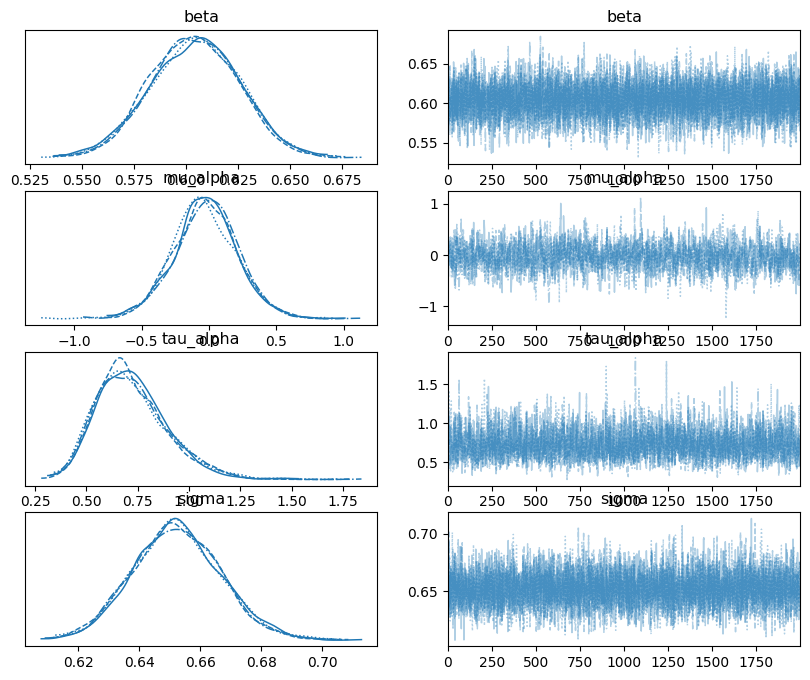

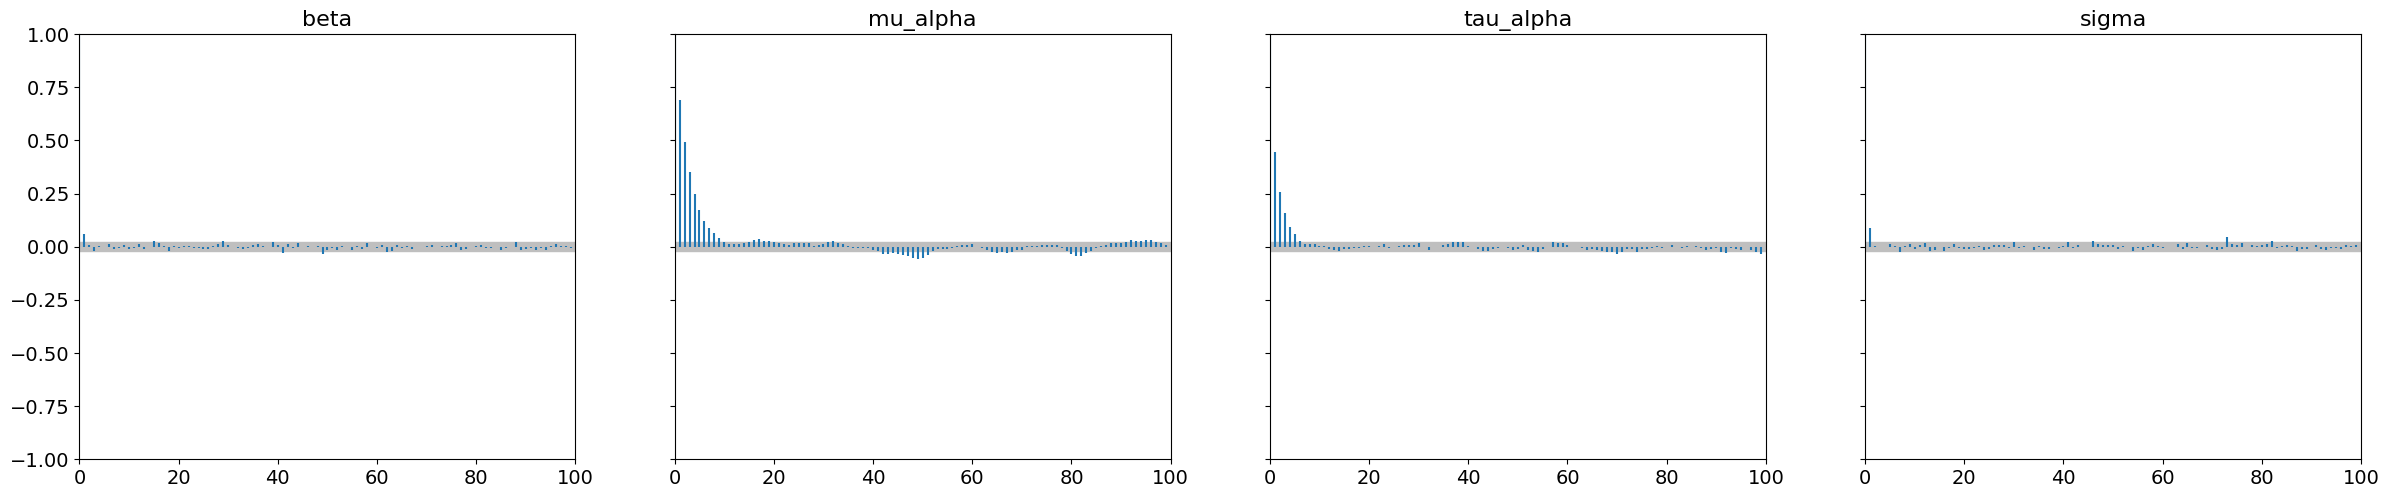

/Users/riddhi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


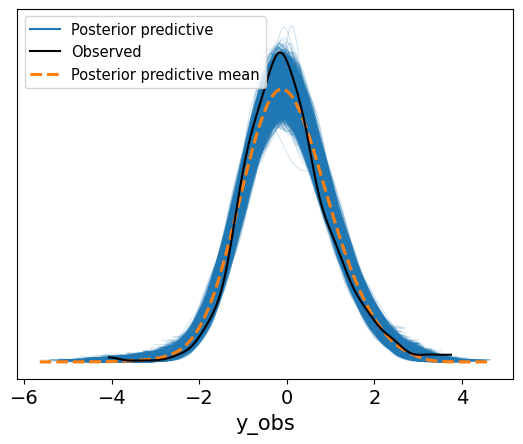

In [28]:

import pymc as pm
import arviz as az

df = pd.read_csv("cleaned_data.csv")

y_raw = df["MD_EARN_WNE_P10"].values
X = df["SAT_AVG"].values
regions, region_index = np.unique(df["REGION_NAME"], return_inverse=True)
R = len(regions)
N = len(y_raw)

y = np.log1p(y_raw)

y = (y - y.mean()) / y.std()

X = (X - X.mean()) / X.std()

#pymc hierarchical model (non-centered)
with pm.Model() as model:
    mu_alpha = pm.Normal("mu_alpha", mu=0.0, sigma=1.0)
    tau_alpha = pm.HalfNormal("tau_alpha", sigma=0.5)
    sigma = pm.HalfNormal("sigma", sigma=0.5)

    z_alpha = pm.Normal("z_alpha", mu=0.0, sigma=1.0, shape=R)
    alpha = pm.Deterministic("alpha", mu_alpha + tau_alpha * z_alpha)


    beta = pm.Normal("beta", mu=0.0, sigma=0.5)

    mu = alpha[region_index] + beta*X
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    idata = pm.sample(
        draws=2000,       
        tune=2000,         
        chains=4,
        cores=4,
        target_accept=0.9, 
        return_inferencedata=True,
        random_seed=42
    )


print(az.summary(idata, var_names=["beta","mu_alpha","tau_alpha","sigma"], round_to=3))

ess = az.ess(idata)
print("ESS (selected):\n", ess)

az.plot_trace(idata, var_names=["beta","mu_alpha","tau_alpha","sigma"], figsize=(10,8))


az.plot_autocorr(idata, var_names=["beta","mu_alpha","tau_alpha","sigma"], combined=True)


ppc = pm.sample_posterior_predictive(
    idata, 
    var_names=["y_obs"],
    random_seed=42,
    model=model
)


az.plot_ppc(ppc, group="posterior")

beta_samples = idata.posterior["beta"].stack(sample=("chain","draw")).values
alpha_samples = idata.posterior["alpha"].stack(sample=("chain","draw")).values  

In [23]:
az.summary(idata, var_names=["beta", "sigma"])["r_hat"]

beta     1.0
sigma    1.0
Name: r_hat, dtype: float64

In [24]:
az.summary(idata, var_names=["beta"])["ess_bulk"]

beta    7088.0
Name: ess_bulk, dtype: float64

array([<Axes: title={'center': 'beta\n0'}>,
       <Axes: title={'center': 'beta\n1'}>,
       <Axes: title={'center': 'beta\n2'}>,
       <Axes: title={'center': 'beta\n3'}>], dtype=object)

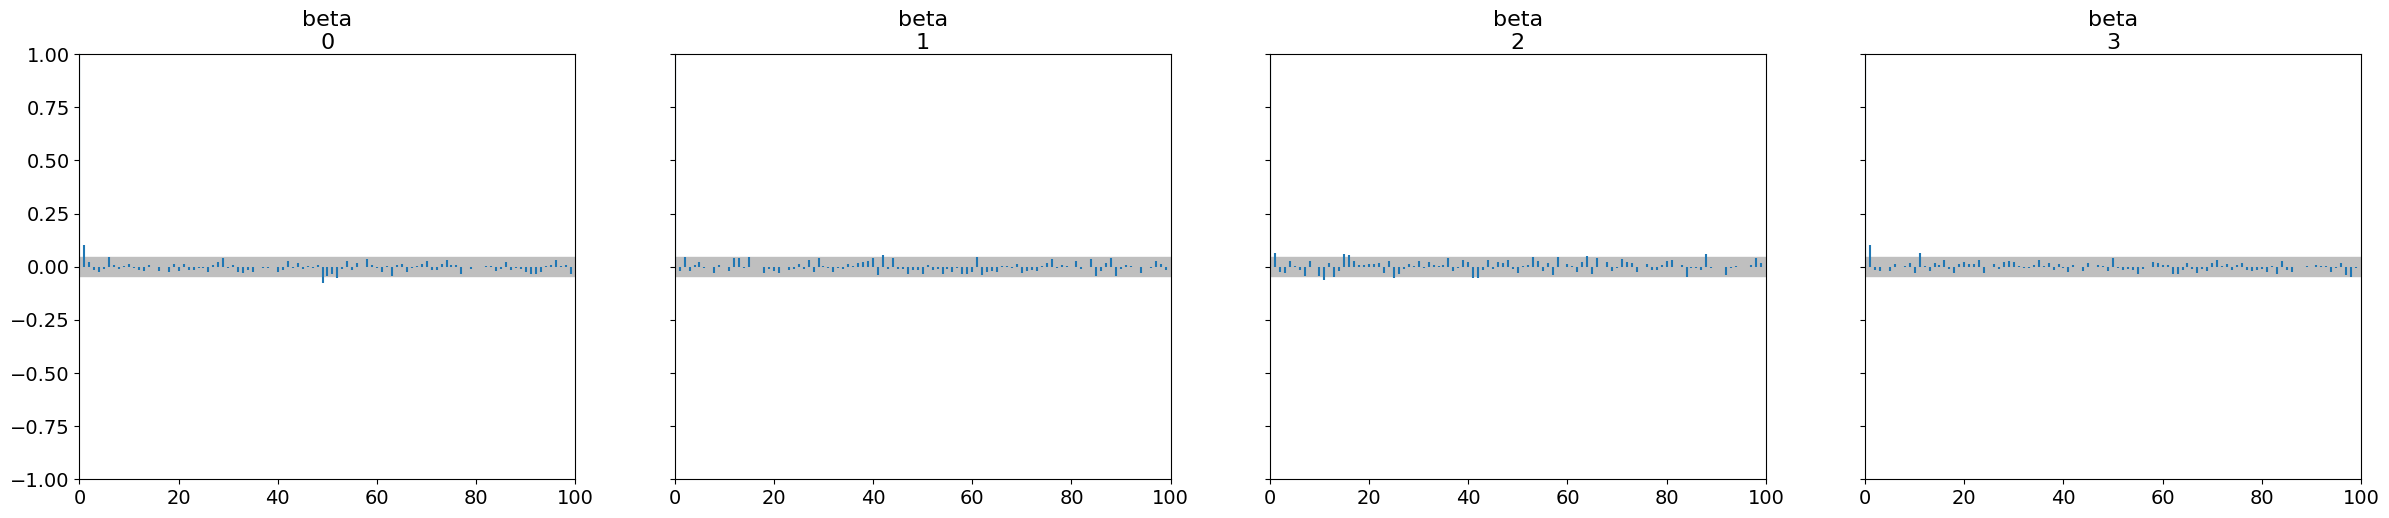

In [25]:
az.plot_autocorr(idata, var_names=["beta"])